In [1]:
# import required packages

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing


pd.set_option('display.max_columns', 300)

In [2]:
# import data

df = pd.read_csv('kc_housing_data_for_feat_engineering_lab.csv', index_col='id')

In [3]:
# glance at data

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
id,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166


In [4]:
# glance at data

df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yr_old           0
year_sold        0
since_sold       0
price_log        0
dtype: int64

In [5]:
# glance at datatypes

df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
yr_old             int64
year_sold          int64
since_sold         int64
price_log        float64
dtype: object

In [6]:
# glance at info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21600 entries, 7129300520 to 1523300157
Data columns (total 24 columns):
date             21600 non-null object
price            21600 non-null float64
bedrooms         21600 non-null int64
bathrooms        21600 non-null float64
sqft_living      21600 non-null int64
sqft_lot         21600 non-null int64
floors           21600 non-null float64
waterfront       21600 non-null int64
view             21600 non-null int64
condition        21600 non-null int64
grade            21600 non-null int64
sqft_above       21600 non-null int64
sqft_basement    21600 non-null int64
yr_built         21600 non-null int64
yr_renovated     21600 non-null int64
zipcode          21600 non-null int64
lat              21600 non-null float64
long             21600 non-null float64
sqft_living15    21600 non-null int64
sqft_lot15       21600 non-null int64
yr_old           21600 non-null int64
year_sold        21600 non-null int64
since_sold       21600 non-nul

### Cleaning/Normalizing/Feature Engineering ###

In [7]:
# no cleaning necessary 
# drop price since I will be working with price_log

df.drop('price', axis=1, inplace=True)

In [8]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old', 'year_sold', 'since_sold',
       'price_log'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<function matplotlib.pyplot.show(*args, **kw)>

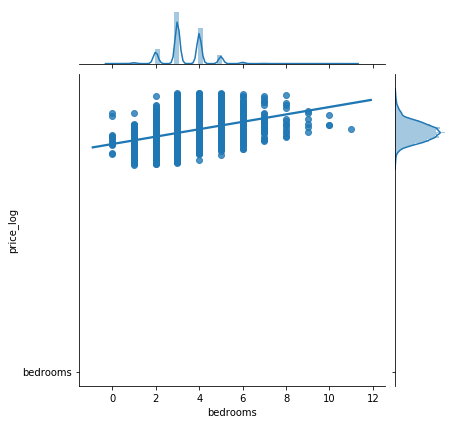

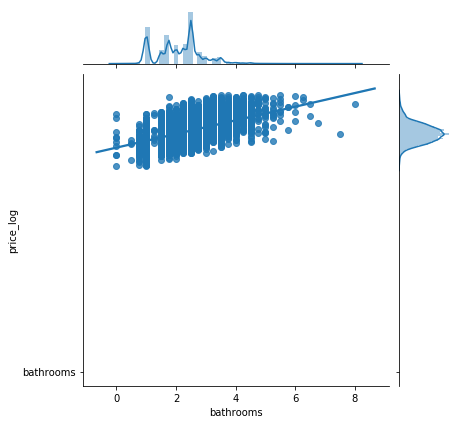

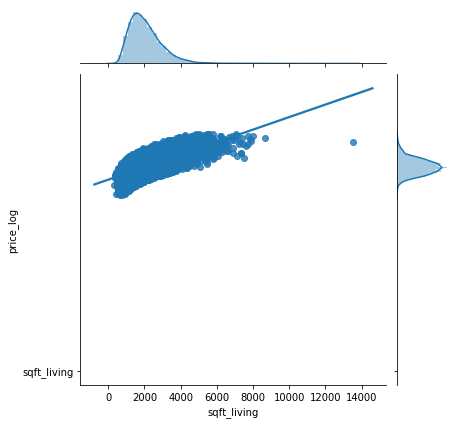

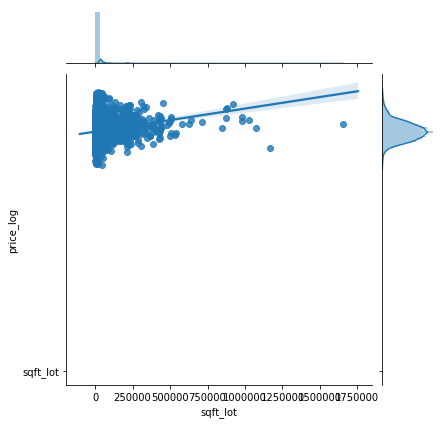

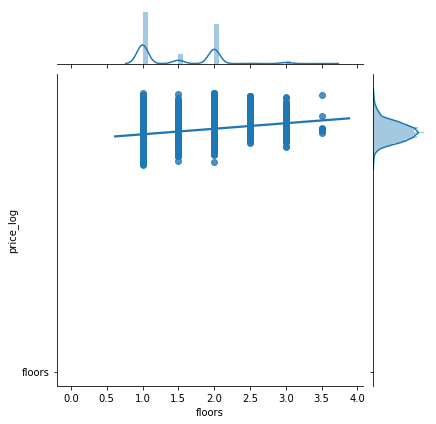

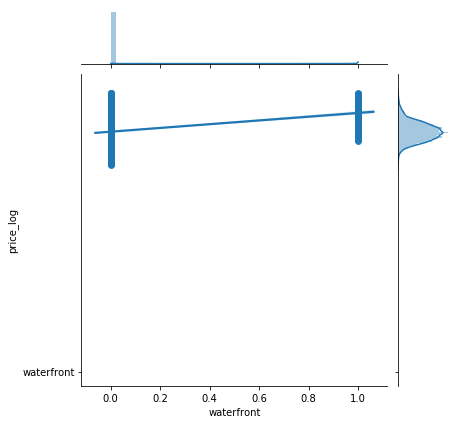

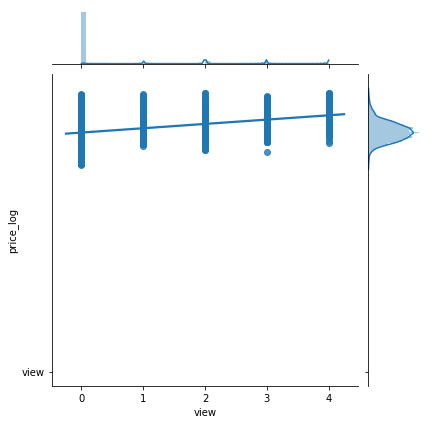

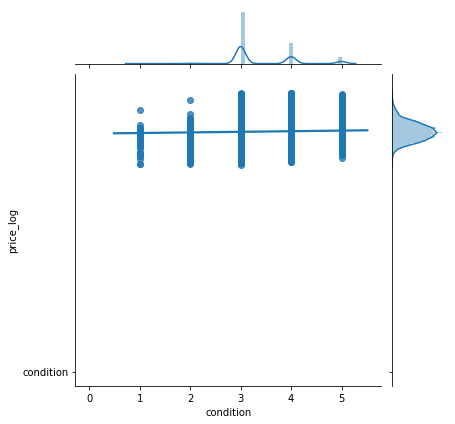

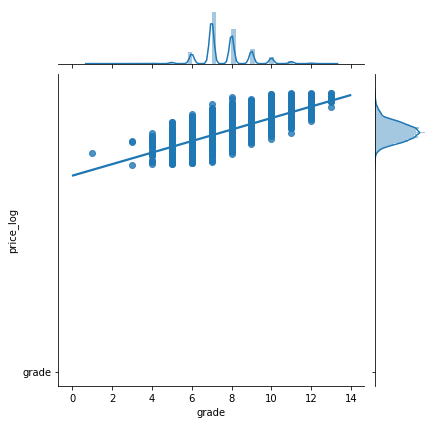

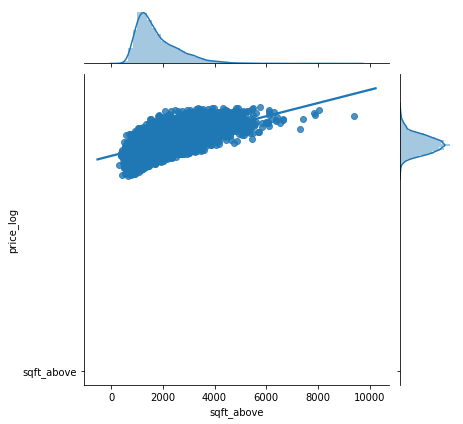

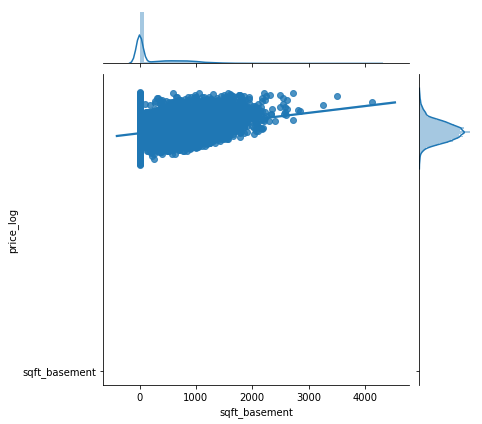

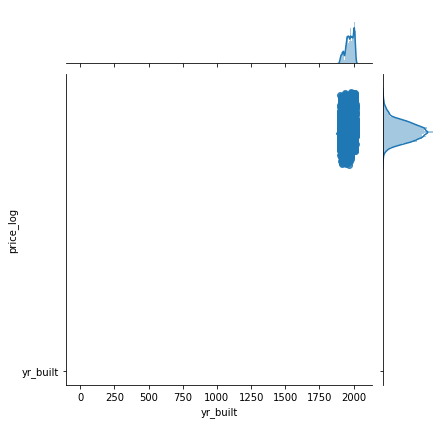

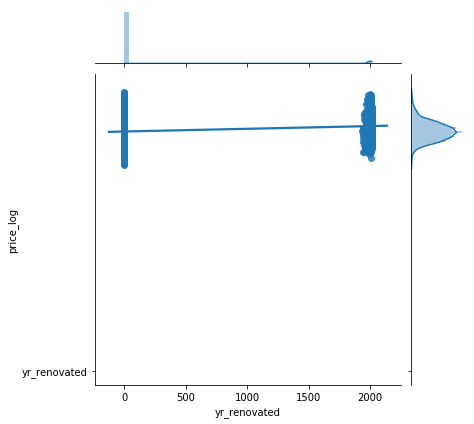

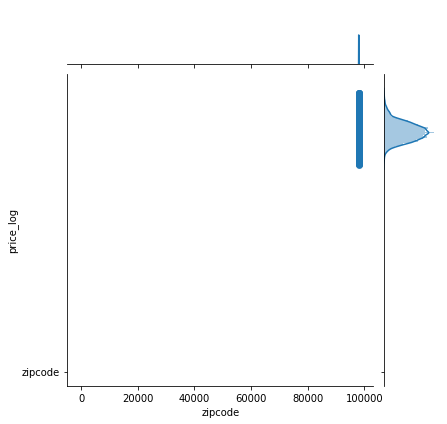

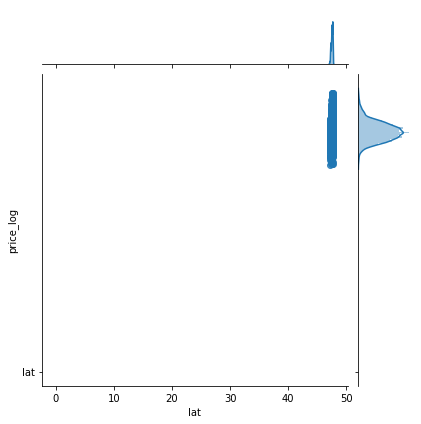

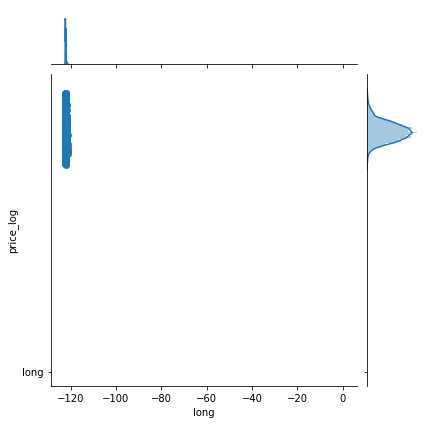

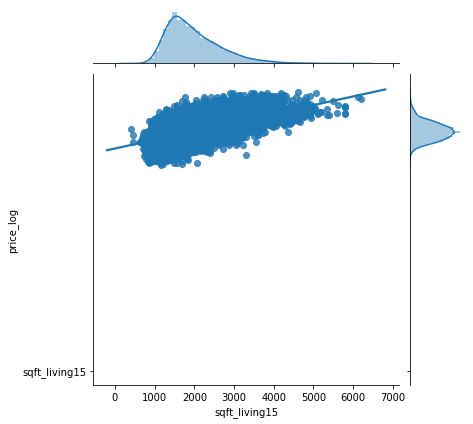

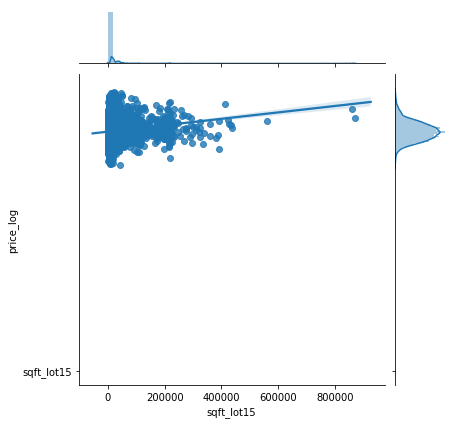

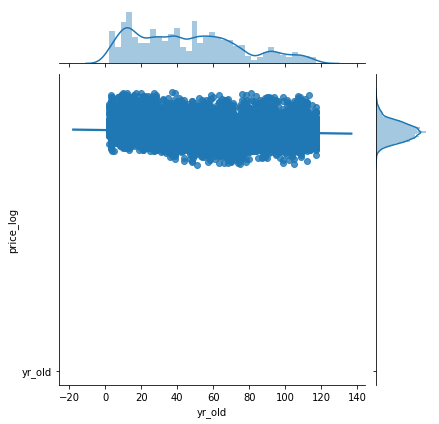

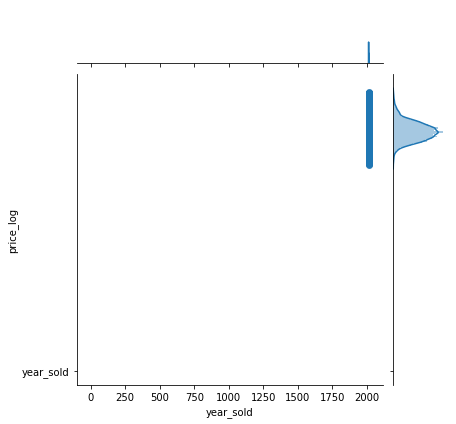

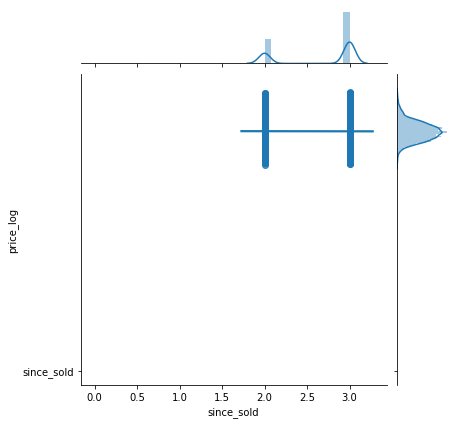

In [9]:
# examine scatterplots for linearity 

X_predictors = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old', 'year_sold', 'since_sold']

for i in X_predictors:
    sns.jointplot(x=i, y="price_log", data=df, kind = 'reg')
    plt.plot(i)
plt.show

In [10]:
# based on the shapes of my scatterplots, I am going to log these features

df['sqft_living_log'] = np.log(df['sqft_living'])
df['sqft_above_log'] = np.log(df['sqft_above'])
df['sqft_living15_log'] = np.log(df['sqft_living15'])

In [11]:
# is it right to drop the columns I logged?

df.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

In [12]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15', 'yr_old',
       'year_sold', 'since_sold', 'price_log', 'sqft_living_log',
       'sqft_above_log', 'sqft_living15_log'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

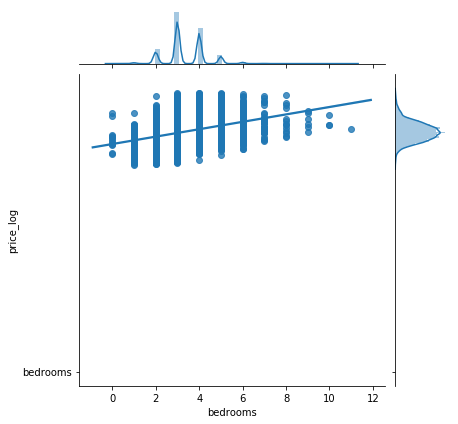

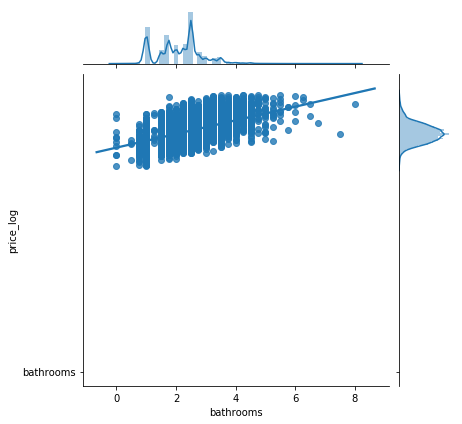

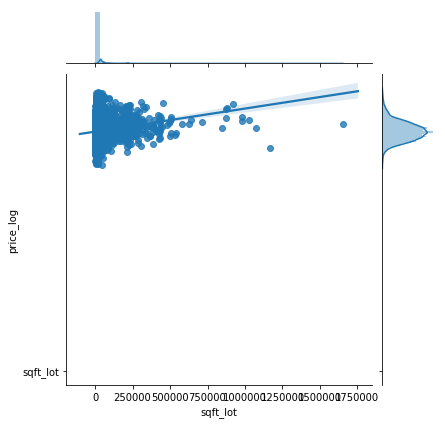

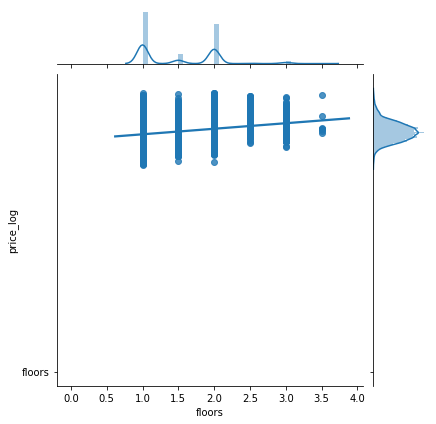

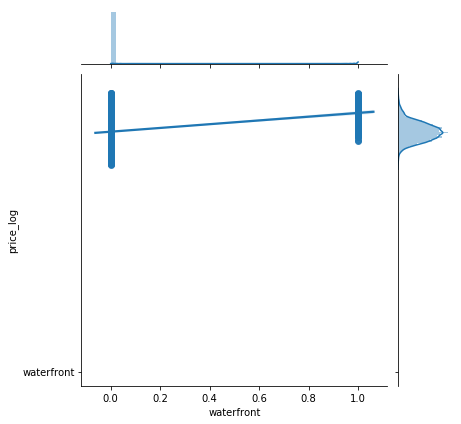

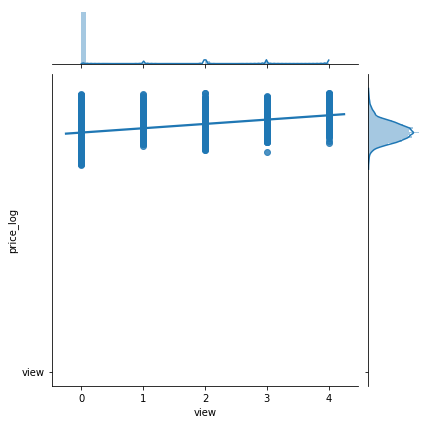

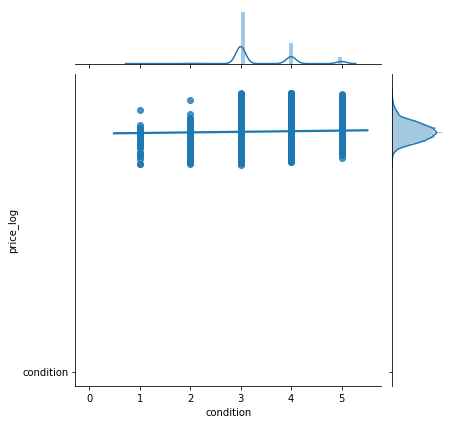

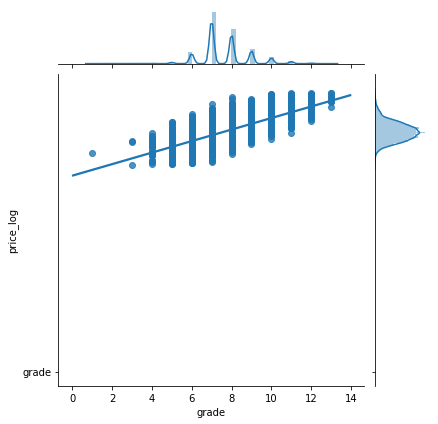

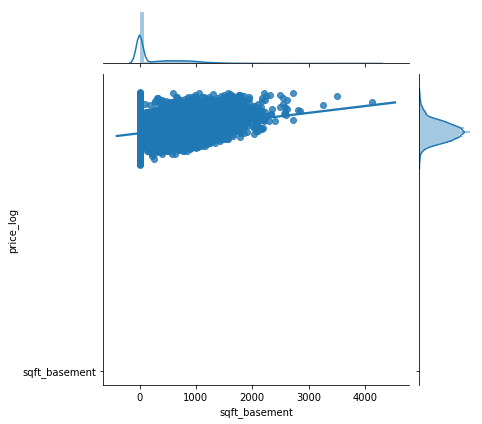

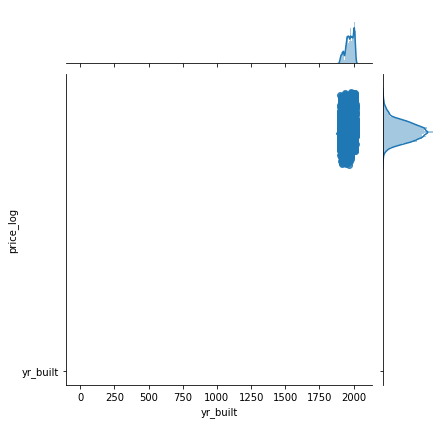

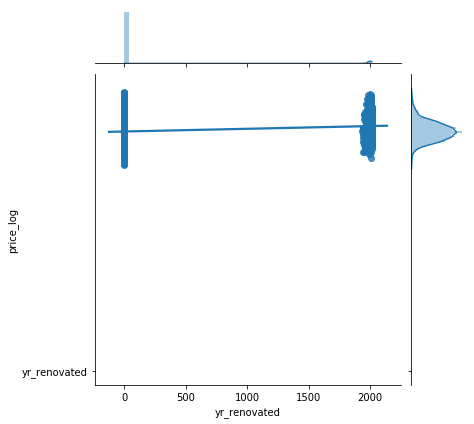

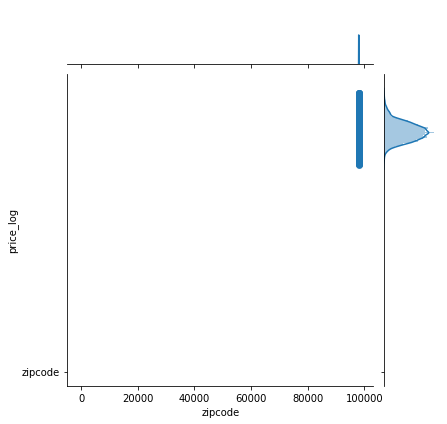

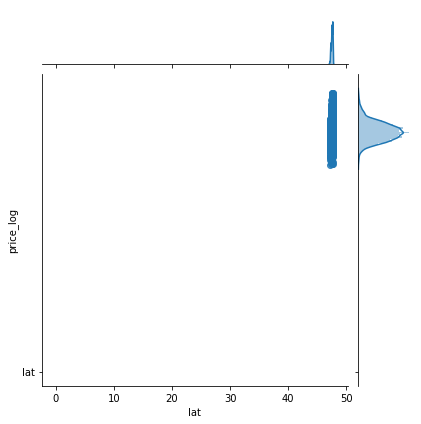

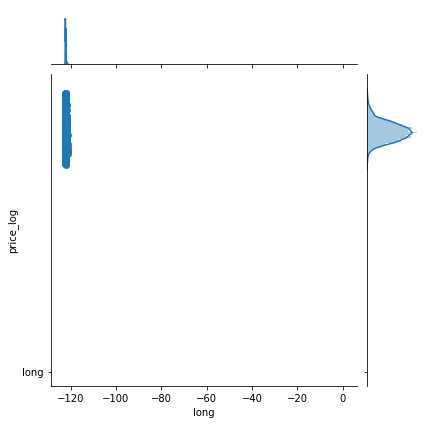

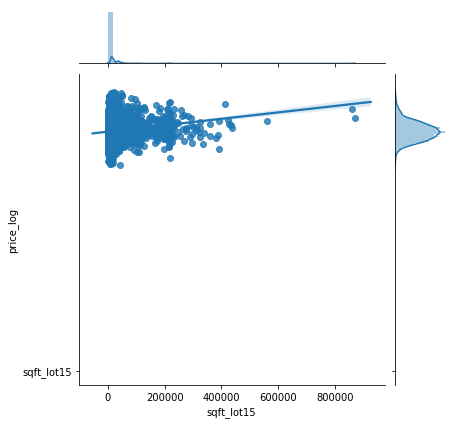

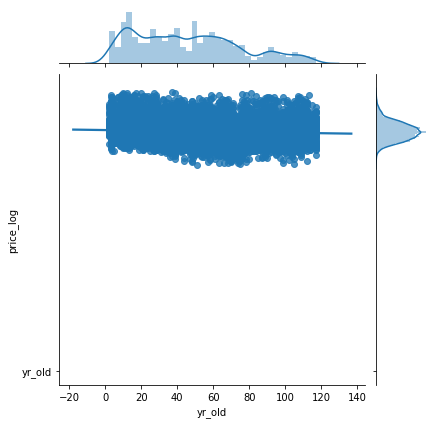

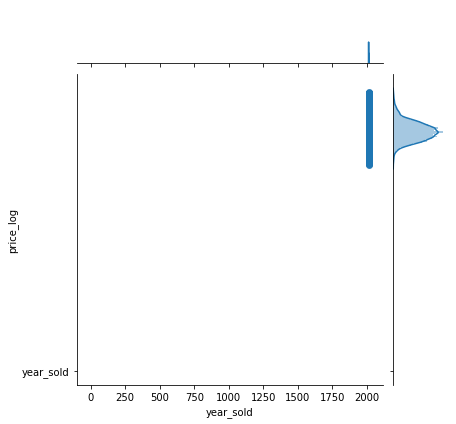

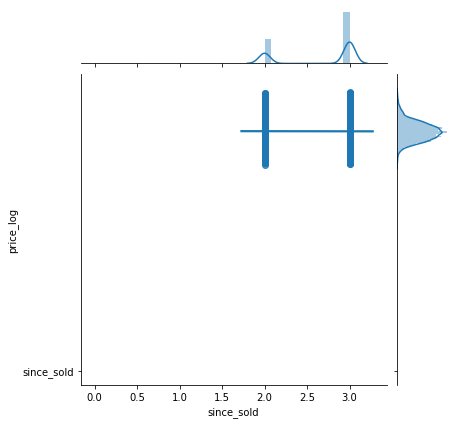

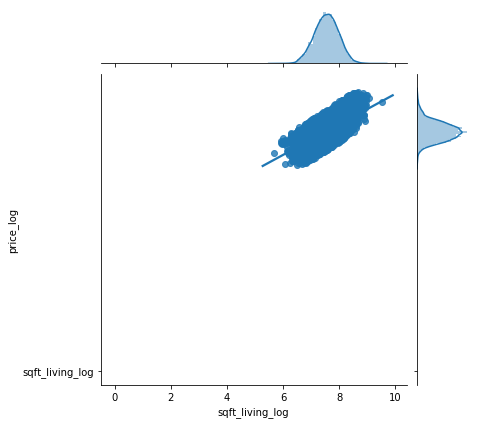

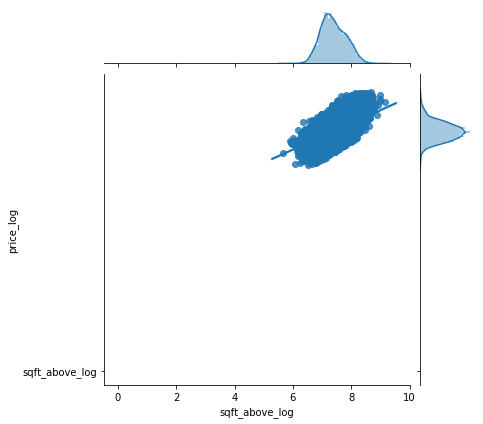

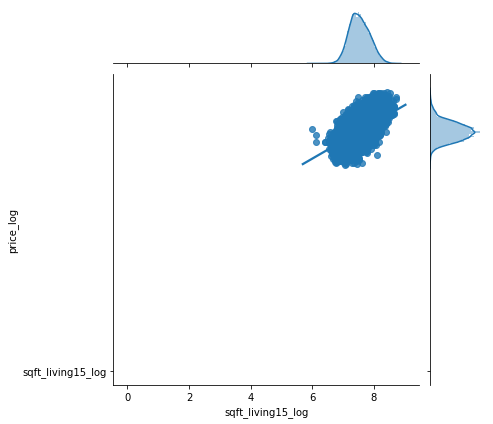

In [13]:
# update X_predictors list and reexamine scatterplots

X_predictors = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15', 'yr_old',
       'year_sold', 'since_sold', 'sqft_living_log',
       'sqft_above_log', 'sqft_living15_log']

for i in X_predictors:
    sns.jointplot(x=i, y="price_log", data=df, kind = 'reg')
    plt.plot(i)
plt.show

In [14]:
# look at the correlation/correlation map to check for collinearity

def corr(dataframe):
    # Create correlation matrix
    corr_matrix = dataframe.corr().abs()
    #print(corr_matrix)
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    print(upper)

# 0.95 threshold recommended for high correlation, drop one - doesn't matter which   

In [15]:
corr(df)

                   bedrooms  bathrooms  sqft_lot    floors  waterfront  \
bedrooms                NaN   0.528002  0.032487  0.180391    0.012113   
bathrooms               NaN        NaN  0.087532  0.502045    0.053042   
sqft_lot                NaN        NaN       NaN  0.005400    0.020839   
floors                  NaN        NaN       NaN       NaN    0.022575   
waterfront              NaN        NaN       NaN       NaN         NaN   
view                    NaN        NaN       NaN       NaN         NaN   
condition               NaN        NaN       NaN       NaN         NaN   
grade                   NaN        NaN       NaN       NaN         NaN   
sqft_basement           NaN        NaN       NaN       NaN         NaN   
yr_built                NaN        NaN       NaN       NaN         NaN   
yr_renovated            NaN        NaN       NaN       NaN         NaN   
zipcode                 NaN        NaN       NaN       NaN         NaN   
lat                     NaN        NaN

In [16]:
def corr_heatmap(dataframe):
    # Generate a mask for the upper triangle
    mask = np.zeros_like(df.corr().abs(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(df.corr().abs(), mask=mask, cmap=cmap, center=0, 
                square=True, linewidths=.1, cbar_kws={"shrink": .5})

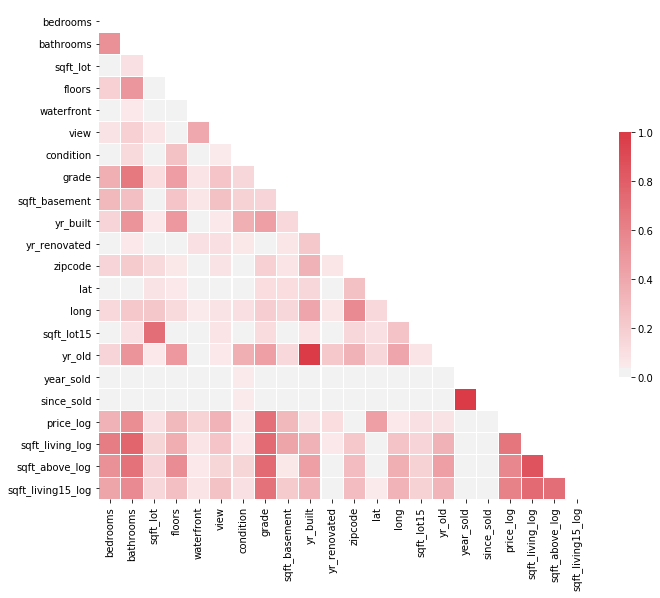

In [17]:
corr_heatmap(df)

In [18]:
# based on the correlation map:
# year sold is highly correlated with since sold &
# year old is highly correlated with yr built
# so I am going to drop year sold and yr built

df.drop(['year_sold', 'yr_built'], axis=1, inplace=True)

In [19]:
df.corr() > 0.95

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,yr_old,since_sold,price_log,sqft_living_log,sqft_above_log,sqft_living15_log
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [21]:
# new feature:    - a binary basement category (0 for no basement, 1 for basement)
#                 - creating a seasons category based on the date 





# need two more features

In [22]:
# create binary for basement: 1 for basement and 0 for no basement

df['basement'] = [1 if df.iloc[n]['sqft_basement'] !=0 else 0 for n in range(0,len(df))]

In [23]:
# convert dates into seasons

# Convert dates
df['date'] = pd.to_datetime(df['date'])

# Build a season_column
# assigning season to month of year
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']

df['season'] = df['date'].map(lambda x: seasons[x.month-1] )


In [24]:
# create dummies for the categorical season values

season_dummies = pd.get_dummies(df['season'], prefix="season_")
season_dummies.head()

,season__Fall,season__Spring,season__Summer,season__Winter
id,,,,
7129300520,1,0,0,0
6414100192,0,0,0,1
5631500400,0,0,0,1
2487200875,0,0,0,1
1954400510,0,0,0,1


In [25]:
# merge dummy season table to main dataframe

df = df.merge(season_dummies, on='id')

In [26]:
df.head()

,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,yr_old,since_sold,price_log,sqft_living_log,sqft_above_log,sqft_living15_log,basement,season,season__Fall,season__Spring,season__Summer,season__Winter
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,5650,1.0,0,0,3,7,0,0,98178,47.5112,-122.257,5650,62,3,12.309982,7.073270,7.073270,7.200425,0,Fall,1,0,0,0
6414100192,2014-12-09,3,2.25,7242,2.0,0,0,3,7,400,1991,98125,47.7210,-122.319,7639,66,3,13.195614,7.851661,7.682482,7.432484,1,Winter,0,0,0,1
5631500400,2015-02-25,2,1.00,10000,1.0,0,0,3,6,0,0,98028,47.7379,-122.233,8062,84,2,12.100712,6.646391,6.646391,7.908387,0,Winter,0,0,0,1
2487200875,2014-12-09,4,3.00,5000,1.0,0,0,5,7,910,0,98136,47.5208,-122.393,5000,52,3,13.311329,7.580700,6.956545,7.215240,1,Winter,0,0,0,1
1954400510,2015-02-18,3,2.00,8080,1.0,0,0,3,8,0,0,98074,47.6168,-122.045,7503,30,2,13.142166,7.426549,7.426549,7.495542,0,Winter,0,0,0,1


In [27]:
# update X_predictors list
# normalize


X_predictors = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_lot15', 'yr_old',
        'since_sold', 'sqft_living_log',
       'sqft_above_log', 'sqft_living15_log']

for col in X_predictors:
    df[col] = (df[col]-df[col].mean())/df[col].std()

In [28]:
df.head()

,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,yr_old,since_sold,price_log,sqft_living_log,sqft_above_log,sqft_living15_log,basement,season,season__Fall,season__Spring,season__Summer,season__Winter
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,-0.403735,-1.446795,-0.228003,-0.909440,-0.085135,-0.303767,-0.625130,-0.549390,-0.660104,-0.208998,1.864231,-0.350898,-0.303549,-0.260556,0.538845,0.693390,12.309982,-1.117210,-0.746084,-1.029279,0,Fall,1,0,0,0
6414100192,2014-12-09,-0.403735,0.185973,-0.189360,0.945257,-0.085135,-0.303767,-0.625130,-0.549390,0.250129,4.772517,0.875023,1.163801,-0.744109,-0.187350,0.675148,0.693390,13.195614,0.719639,0.682976,-0.320139,1,Winter,0,0,0,1
5631500400,2015-02-25,-1.503536,-1.446795,-0.122414,-0.909440,-0.085135,-0.303767,-0.625130,-1.401555,-0.660104,-0.208998,-0.935414,1.285814,-0.133009,-0.171781,1.288513,-1.442123,12.100712,-2.124559,-1.747435,1.134155,0,Winter,0,0,0,1
2487200875,2014-12-09,0.696067,1.165634,-0.243781,-0.909440,-0.085135,-0.303767,2.443017,-0.549390,1.410677,-0.208998,1.080330,-0.281589,-1.269939,-0.284480,0.198087,0.693390,13.311329,0.080224,-1.019889,-0.984006,1,Winter,0,0,0,1
1954400510,2015-02-18,-0.403735,-0.140580,-0.169019,-0.909440,-0.085135,-0.303767,-0.625130,0.302776,-0.660104,-0.208998,-0.076856,0.411505,1.202883,-0.192356,-0.551581,-1.442123,13.142166,-0.283541,0.082621,-0.127443,0,Winter,0,0,0,1


### Exploratory Data Analysis ###

In [29]:
#sns.pairplot(df)    too many features... takes too long to load

In [30]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [31]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 26 numerical variables


In [39]:
df.describe()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_renovated,zipcode,lat,long,sqft_lot15,yr_old,since_sold,price_log,sqft_living_log,sqft_above_log,sqft_living15_log,basement,season__Fall,season__Spring,season__Summer,season__Winter
count,"21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000","21,956.0000"
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,13.0417,0.0000,0.0000,0.0000,0.3920,0.2338,0.3023,0.2917,0.1722
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5263,1.0000,1.0000,1.0000,0.4882,0.4233,0.4593,0.4546,0.3775
min,-3.7031,-2.7530,-0.3525,-0.9094,-0.0851,-0.3038,-3.6933,-5.6624,-0.6601,-0.2090,-1.4393,-2.9161,-2.1653,-0.4445,-1.5057,-1.4421,11.2252,-4.4289,-4.0381,-4.7313,0.0000,0.0000,0.0000,0.0000,0.0000
25%,-0.4037,-0.7937,-0.2426,-0.9094,-0.0851,-0.3038,-0.6251,-0.5494,-0.6601,-0.2090,-0.8421,-0.6456,-0.8152,-0.2808,-0.8583,-1.4421,12.6761,-0.6803,-0.7263,-0.7256,0.0000,0.0000,0.0000,0.0000,0.0000
50%,-0.4037,0.1860,-0.1802,0.0179,-0.0851,-0.3038,-0.6251,-0.5494,-0.6601,-0.2090,-0.2448,0.0816,-0.1259,-0.1880,-0.1086,0.6934,13.0170,0.0192,-0.0912,-0.0769,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.6961,0.5125,-0.1064,0.9453,-0.0851,-0.3038,0.9089,0.3028,0.6142,-0.2090,0.7444,0.8526,0.6344,-0.0975,0.6751,0.6934,13.3692,0.6919,0.7152,0.7003,1.0000,0.0000,1.0000,1.0000,0.0000
max,8.3947,7.6967,39.7188,3.7273,11.7455,4.9447,2.4430,4.5636,8.7381,4.8326,2.2562,1.5724,6.3901,31.5965,2.4130,0.6934,15.1636,4.6410,4.1243,3.6569,1.0000,1.0000,1.0000,1.0000,1.0000


### Running Baseline Linear Regression Model ### 

In [ ]:
# where/when do I reverse the logs?
# np.exp(df['price_log'])

In [40]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'yr_old', 'since_sold',
       'price_log', 'sqft_living_log', 'sqft_above_log', 'sqft_living15_log',
       'basement', 'season', 'season__Fall', 'season__Spring',
       'season__Summer', 'season__Winter'],
      dtype='object')

In [44]:
X = df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_lot15', 'yr_old', 'since_sold',
       'sqft_living_log', 'sqft_above_log', 'sqft_living15_log',
       'basement', 'season__Fall', 'season__Spring',
       'season__Summer', 'season__Winter']]
y = df['price_log']

In [45]:
# split the data into testing and training data
# run testing model

def model_run(features, target, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
    lm = model()
    lm.fit(X_train, y_train)
    y_test_predictions = lm.predict(X_test)
    y_train_predictions = lm.predict(X_train)
    print('Intercept: ', lm.intercept_)
    coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
    pd.options.display.float_format = '{:,.4f}'.format
    print(coeff_df)
    plt.scatter(y_test, y_test_predictions)
    plt.xlabel('y Test Values')
    plt.ylabel('y Predicted Values')
    plt.title('Test Data: Actual vs. Predicted Y Values')
    plt.show()
    sns.distplot((y_test-y_test_predictions), bins=50)
    print('MAE: ', metrics.mean_absolute_error(y_test, y_test_predictions))
    print('MSE: ', metrics.mean_squared_error(y_test, y_test_predictions))
    print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_predictions)))
    print('R-squared: ', metrics.r2_score(y_test, y_test_predictions))
    # comparing mean squared errors of the training data to the mean squared errors of the 
    # testing data
    train_mse = metrics.mean_squared_error(y_train, y_train_predictions)
    test_mse = metrics.mean_squared_error(y_test, y_test_predictions)
    print('Train Mean Squarred Error:', train_mse)
    print('Test Mean Squarred Error:', test_mse)

Intercept:  13.009951411201621
                   Coefficient
bedrooms               -0.0236
bathrooms               0.0465
sqft_lot                0.0209
floors                  0.0402
waterfront              0.0313
view                    0.0474
condition               0.0414
grade                   0.1889
sqft_basement           0.0214
yr_renovated            0.0141
zipcode                -0.0330
lat                     0.1939
long                   -0.0224
sqft_lot15             -0.0069
yr_old                  0.1037
since_sold             -0.0333
sqft_living_log         0.0482
sqft_above_log          0.0875
sqft_living15_log       0.0684
basement                0.0752
season__Fall            0.0088
season__Spring          0.0065
season__Summer          0.0170
season__Winter         -0.0323


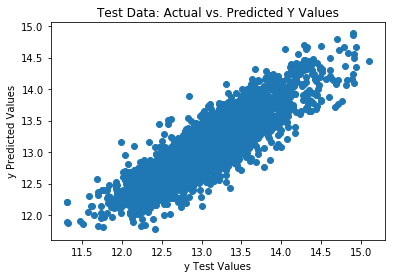

MAE:  0.1938771291139062
MSE:  0.06280753528344178
RMSE:  0.25061431579908156
R-squared:  0.7609871639633723
Train Mean Squarred Error: 0.06271693164586488
Test Mean Squarred Error: 0.06280753528344178


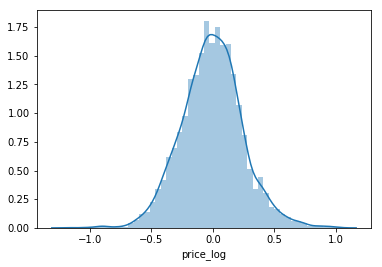

In [46]:
model_run(X, y, LinearRegression)

In [47]:
# calculate p-values

def calc_p(features, target):
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

In [48]:
calc_p(X,y)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3258.
Date:                Sun, 16 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:30:08   Log-Likelihood:                -753.17
No. Observations:               21956   AIC:                             1554.
Df Residuals:                   21932   BIC:                             1746.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.4064      0.00

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
# I created the function above but should I have these in one function or multiple functions?

# y_test_predictions = lm.predict(X_test)
# y_train_predictions = lm.predict(X_train)

# looking at the actual y values in the test dataset verses the predicted y values in the test dataset

# def scatter_plot(y, y_pred):
#     plt.scatter(y, y_pred)
#     plt.xlabel('y Test Values')
#     plt.ylabel('y Predicted Values')
#     plt.title('Test Data: Actual vs. Predicted Y Values')
#     plt.show()

# def calc_errors(y, y_pred):
#     print('MAE: ', metrics.mean_absolute_error(y, y_pred))
#     print('MSE: ', metrics.mean_squared_error(y, y_pred))
#     print('RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
#     print('R-squared: ', metrics.r2_score(y, y_pred))